# Hälsostudie – Del 2

Fördjupning, strukturering av kod och pipeline.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression

sns.set()
np.random.seed(42)

In [4]:
import sys
sys.path.append("..")

from src.data_loading import load_health_data

df = load_health_data()
df.head()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


In [5]:
from src.statistics import basic_descriptive_stats

sys.path.append(os.path.abspath(".."))

basic_stats = basic_descriptive_stats(df)
basic_stats

,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


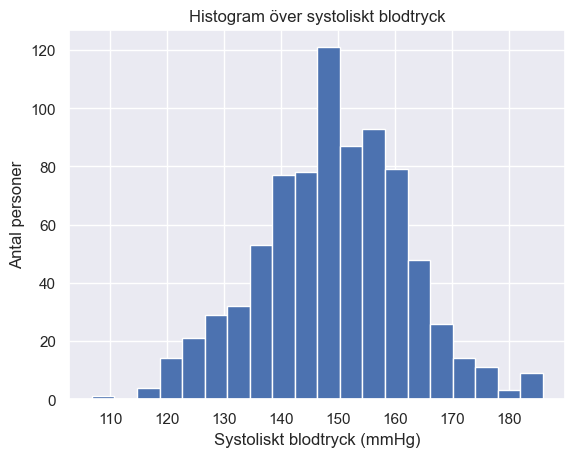

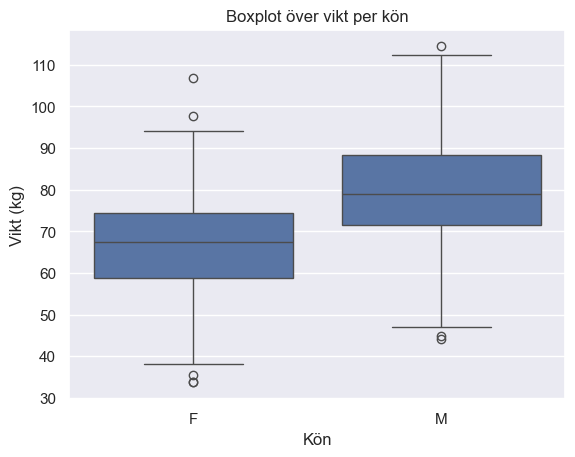

In [6]:
from src.visualization import plot_bp_histogram, plot_weight_box_by_sex

plot_bp_histogram(df)
plot_weight_box_by_sex(df)


In [ ]:
from src.health_analyzer import HealthAnalyzer

analyzer = HealthAnalyzer(df=df)

# Testa statistik via klassen
analyzer_basic_stats = analyzer.describe_basic()
analyzer_basic_stats

,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


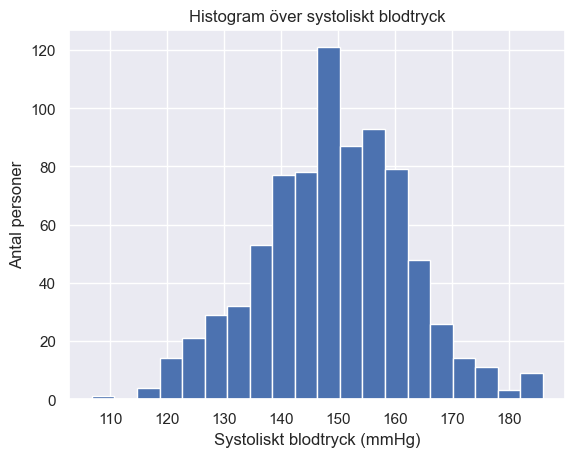

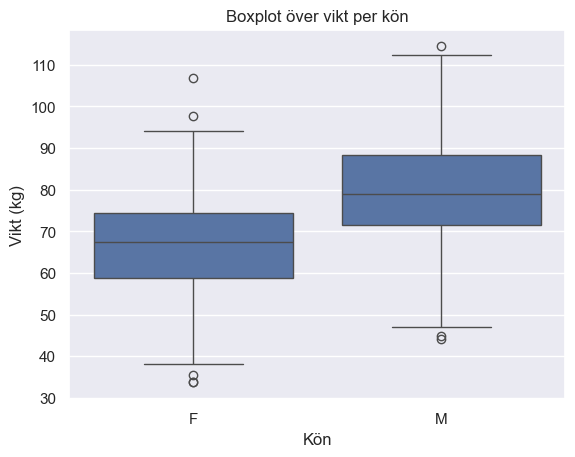

In [8]:
# Testa grafer via klassen
analyzer.show_bp_histogram()
analyzer.show_weight_box_by_sex()


In [9]:
# Testa regressionen
reg_results = analyzer.fit_bp_regression()
reg_results["coefficients"], reg_results["intercept"], reg_results["r2"]

(age       0.538928
 weight    0.177658
 dtype: float64,
 np.float64(109.49908144566373),
 0.4052560814611623)

In [10]:
coeffs = reg_results["coefficients"]
intercept = reg_results["intercept"]
r2 = reg_results["r2"]

print("Intercept:", intercept)
print("\nKoefficienter:")
print(coeffs)
print("\nFörklaringsgrad R^2:", r2)

Intercept: 109.49908144566373

Koefficienter:
age       0.538928
weight    0.177658
dtype: float64

Förklaringsgrad R^2: 0.4052560814611623


## Multipel linjär regression: blodtryck ~ ålder + vikt

Jag anpassar en multipel linjär regressionsmodell där systolistiskt blodtryck
förklaras av både ålder och vikt. Kofficienterna visar hur mycket det
förväntade blodtrycket förändras när ålder eller vikt ökar med en enhet,
givet att den andra variabeln hålls konstant.

- Interceptet är modellens uppskattade värde när ålder och vikt är 0
- Kofficienten för **ålder** visar den ungefärliga ökningen i blodtryck (mmHg)
  per extra år.
- Kofficienten för **vikt** visar den uppskattade ökningen i blodtryck per
  kilo.

R²-värdet anger hur stor del av variationen i systoliskt blodtryck som modellen
förklarar. En högre R² innebär att ålder och vikt tillsammans förklarar en
större del av variationen.

Multipel regression uppfyller kravet på en metod baserad på linjär algebra,
eftersom modellen bygger på matricer och vektorer (Xβ ≈ y).
